<a href="https://colab.research.google.com/github/Zoya-Fathima/Pythonprogramming/blob/master/image_classify1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [4]:
print(data_dir.glob('*/*.jpg'))

<generator object Path.glob at 0x7bd07f8f0430>


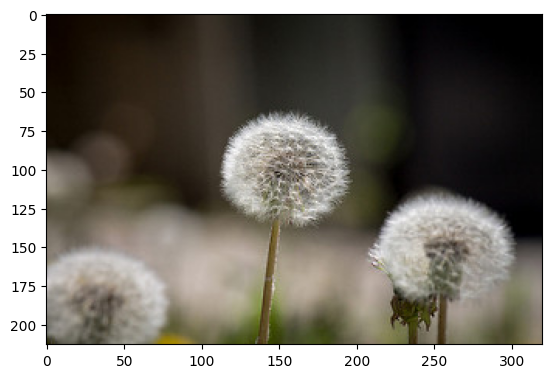

In [5]:
flowers = list(data_dir.glob('*/*'))
plt.imshow(PIL.Image.open(str(flowers[425])))
plt.show()

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split=0.2,
                                                       batch_size=batch_size,
                                                       image_size=(img_height, img_width),
                                                       seed=123,
                                                       subset="training")
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            batch_size=batch_size,
                                                            image_size=(img_height, img_width),
                                                            seed=123,
                                                            subset="validation")

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
from PIL import Image
import numpy as np
for batch in train_ds.take(1):
  print(batch[1].numpy())
#  pil_img = Image.fromarray(batch[0][16].numpy(), mode="L")
#  pil_img.save("./img16.png")
#  Image.show(pil_img)
#  print([arr.numpy() for arr in batch[0][0]])
#16 1 0 3 2; 0 1 2 3 4;
#13 4 14 1 3; dandelion sunflower daisy roses tulip

[2 1 4 3 1 2 1 2 4 1 4 4 3 4 1 2 0 4 1 1 1 4 3 2 3 1 4 2 2 3 4 3]


In [9]:
for batch in train_ds.take(1):
  pil_img = tf.keras.preprocessing.image.array_to_img(batch[0][3].numpy())
  pil_img.save("./img4.png")

In [10]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
class_names = ["dandelion", "roses", "daisy", "sunflower", "tulip"]

In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [14]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
epochs = 15
with tf.device('/device:GPU:0'):
  history = model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/15
92/92 [==============================] - 142s 2s/step - loss: 1.3078 - accuracy: 0.4240 - val_loss: 1.1468 - val_accuracy: 0.5232
Epoch 2/15
92/92 [==============================] - 132s 1s/step - loss: 1.0659 - accuracy: 0.5657 - val_loss: 1.0433 - val_accuracy: 0.6076
Epoch 3/15
92/92 [==============================] - 132s 1s/step - loss: 0.9520 - accuracy: 0.6294 - val_loss: 0.9433 - val_accuracy: 0.6294
Epoch 4/15
92/92 [==============================] - 136s 1s/step - loss: 0.8800 - accuracy: 0.6563 - val_loss: 0.8506 - val_accuracy: 0.6689
Epoch 5/15
92/92 [==============================] - 129s 1s/step - loss: 0.8187 - accuracy: 0.6856 - val_loss: 0.8706 - val_accuracy: 0.6703
Epoch 6/15
92/92 [==============================] - 130s 1s/step - loss: 0.7804 - accuracy: 0.7016 - val_loss: 0.8768 - val_accuracy: 0.6567
Epoch 7/15
92/92 [==============================] - 129s 1s/step - loss: 0.7460 - accuracy: 0.7183 - val_loss: 0.8920 - val_accuracy: 0.6703
Epoch 8/15
92

In [17]:
device_name = tf.test.gpu_device_name()

In [27]:
#model.save('./drive/MyDrive/imageclassifier1.h5')
model= keras.models.load_model('./drive/MyDrive/imageclassifier1.h5')

OSError: ignored

In [28]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

117948/117948 [==============================] - 0s 0us/step


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 158ms/step


In [23]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.4055725e-07, 1.2477231e-04, 3.6682155e-05, 9.9284691e-01,
       6.9913617e-03], dtype=float32)>

In [24]:
import numpy as np
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflower with a 99.28 percent confidence.
